### ANN/MLP จำแนกผลไม้ 2 Class
Artificial Neural Network ด้วย MLP Scikit-learn จำแนก 2 Class (Binary Classification)

In [120]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset

In [121]:
df = pd.read_csv('data/fruit2class.csv')

df.sample(7)
df.sample(6,random_state=1)

,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,0
4,6.9,5.9,0


In [122]:
df.isnull().sum() #มี missing values หรือไม่

#dataset ที่นำมาใช้กับ Neuron Network จะต้องไม่่มี missing values

m         0
d         0
target    0
dtype: int64

In [123]:
df.target.unique() # Dataset มี Class อะไรบ้าง

array([0, 1])

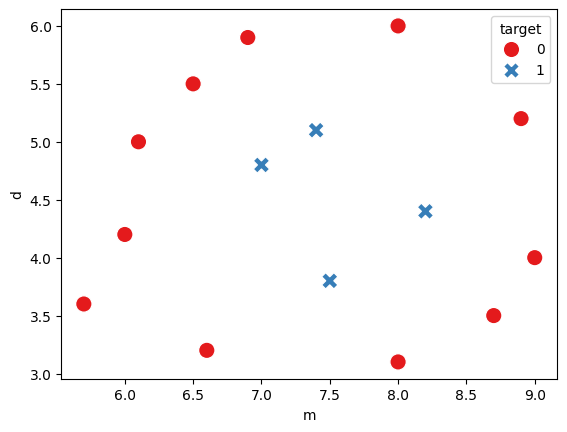

In [124]:
# sns.scatterplot(x='m', y='d', data=df, hue='target', style='target', s=140)
sns.scatterplot(x='m', y='d', data=df, hue='target', style='target', s=140, palette='Set1')
plt.show()

In [125]:
# เตรียม X (Features) และ y target(class)
X = df.drop('target', axis=1)
y = df.target

### Feature Scaling
ปรับค่าสเกล Feature

In [126]:
from sklearn.preprocessing import StandardScaler #ใช้กัย data ที่มีการแจกแจงแบบ normal
sc = StandardScaler()

X_train = sc.fit_transform(X)

y_train = y

In [127]:
df_sc = pd.DataFrame(X_train, columns=['d', 'm'])
df_sc['target'] = y_train
df_sc.head(8)
df_sc.sample(6,random_state=1)

,d,m,target
3,-0.736514,-1.398477,0
7,-0.352246,0.340562,1
6,0.800559,-0.094198,1
2,-0.832581,1.101391,0
10,1.473028,0.775322,0
4,-0.448313,1.536151,0


### Model

In [128]:
from sklearn.neural_network import MLPClassifier

#### case 1 : hidden = 100, iteration = 200 (default)

In [ ]:
hidden = 100
# model = MLPClassifier(random_state=1) # default hidden_layer_sizes=100
model = MLPClassifier(random_state=1, verbose=True)

#### case 2 : hidden = 100, iteration = 2000

In [ ]:
iter = 2000
hidden = 100
model = MLPClassifier(max_iter=iter, random_state=1) # hidden = 100

#### case 3 : hidden = 150, iteration = 200

In [ ]:
hidden = 150
iter = 200
model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1)

#### case 4 : hidden = 4, iteration = 1000

In [ ]:
hidden = 4
iter = 1000
model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1)

### case 5 : hidden = 10 , iteration = 2000

In [129]:
hidden = 10
iter = 2000
model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1)

### Train the Model

In [130]:
model.fit(X_train, y_train)

c:\Users\araya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=10, max_iter=2000, random_state=1)

In [131]:
print('score: {:.4f}'.format(model.score(X_train, y_train)))
#print('score : ', model.score9X_train, y_train)
print('actual y : ', np.array(y))
print('predicted : ', model.predict(X_train))

score: 1.0000
actual y :  [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
predicted :  [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]


### Evaluation

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_train)
class_names = ['Grape', 'Lemon']

print('Score -> {:.4f}' .format(model.score(X_train, y_train)))
print(classification_report(y_train, y_predict, target_names = class_names))
print(confusion_matrix(y_train, y_predict))

Score -> 1.0000
              precision    recall  f1-score   support

       Grape       1.00      1.00      1.00        11
       Lemon       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[11  0]
 [ 0  4]]


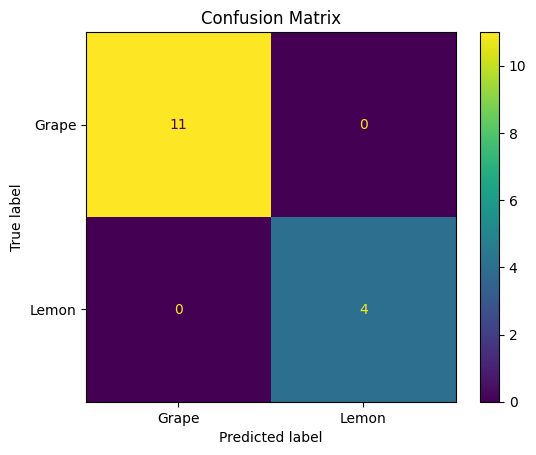

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_predict)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

### Decision Regions

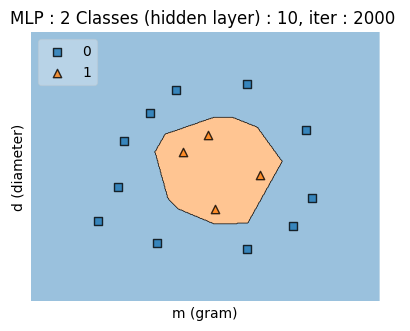

In [134]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)

plt.title('MLP : 2 Classes (hidden layer) : {}, iter : {} '.format(hidden,iter))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')

plt.show()

In [135]:
[coef.shape for coef in model.coefs_]

[(2, 10), (10, 1)]

### Loss curve

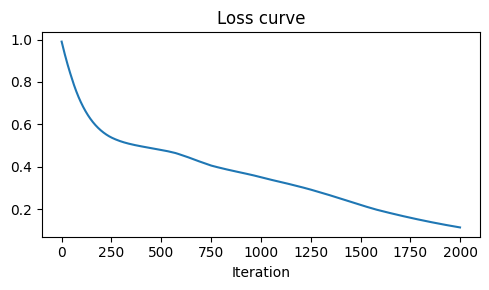

In [136]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.tight_layout()
plt.show()

### ANN/MLP จำแนกผลไม้ 3 class
Artificial Neuron Network ด้วย scikit-learn จำแนก 3 class

In [137]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset

In [141]:
df = pd.read_csv('data/fruit3class.csv')
df

,m,d,target
0,6.0,4.2,0
1,5.7,3.6,0
2,6.5,5.5,0
3,6.6,3.2,0
4,6.9,5.9,0
5,8.0,3.1,0
6,8.2,4.4,1
7,7.0,4.8,1
8,7.5,3.8,1
9,7.4,5.1,1


In [142]:
df.shape

(15, 3)

In [143]:
df.isnull().sum() #มี missing values หรือไม่

#dataset ที่นำมาใช้กับ Neuron Network จะต้องไม่่มี missing values

m         0
d         0
target    0
dtype: int64

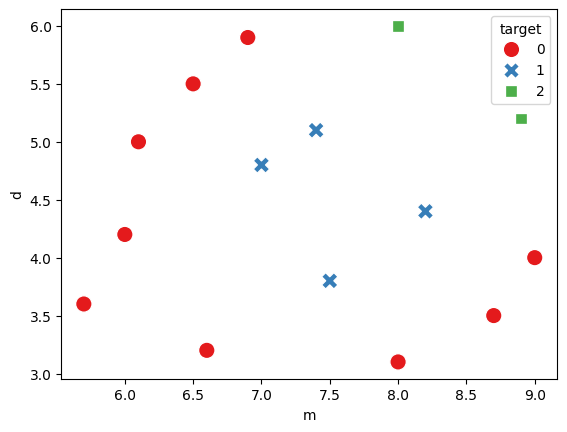

In [144]:
sns.scatterplot(x='m', y='d', data=df, hue='target', style='target', s=140, palette='Set1')
plt.show()

In [146]:
X = df.drop(['target'], axis=1)
X

,m,d
0,6.0,4.2
1,5.7,3.6
2,6.5,5.5
3,6.6,3.2
4,6.9,5.9
5,8.0,3.1
6,8.2,4.4
7,7.0,4.8
8,7.5,3.8
9,7.4,5.1


In [148]:
y = df.target
y

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    2
11    2
12    0
13    0
14    0
Name: target, dtype: int64

### Feature Scaling
คือ การปรับค่า scale ของ feature

In [149]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X)

y_train = y

In [150]:
df_sc = pd.DataFrame(X_train, columns=['d', 'm'])
df_sc['target'] = y_train
df_sc.head(8)
df_sc.sample(6,random_state=1)

,d,m,target
3,-0.736514,-1.398477,0
7,-0.352246,0.340562,1
6,0.800559,-0.094198,1
2,-0.832581,1.101391,0
10,1.473028,0.775322,2
4,-0.448313,1.536151,0


### Model

In [152]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(X_train, y_train)

In [153]:
hidden = 150
iter = 200
model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1)

### Train the model

In [154]:
model.fit(X_train, y_train)

c:\Users\araya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=150, random_state=1)

In [155]:
print('score: {:.4f}'.format(model.score(X_train, y_train)))
#print('score : ', model.score9X_train, y_train)
print('actual y : ', np.array(y))
print('predicted : ', model.predict(X_train))

score: 1.0000
actual y :  [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]
predicted :  [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]


### Evaluation

In [156]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_train)
class_names = ['Grape', 'Lemon', 'Orange']

print('Score -> {:.4f}' .format(model.score(X_train, y_train)))
print(classification_report(y_train, y_predict, target_names = class_names))
print(confusion_matrix(y_train, y_predict))

Score -> 1.0000
              precision    recall  f1-score   support

       Grape       1.00      1.00      1.00         9
       Lemon       1.00      1.00      1.00         4
      Orange       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[9 0 0]
 [0 4 0]
 [0 0 2]]


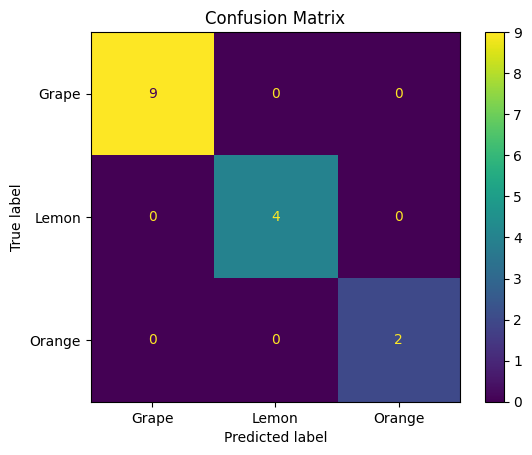

In [157]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_predict)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

### Decision Region

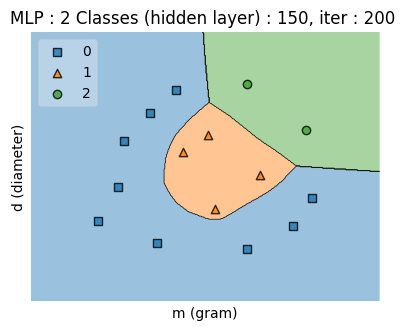

In [158]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)

plt.title('MLP : 2 Classes (hidden layer) : {}, iter : {} '.format(hidden,iter))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')

plt.show()

### Loss Curve

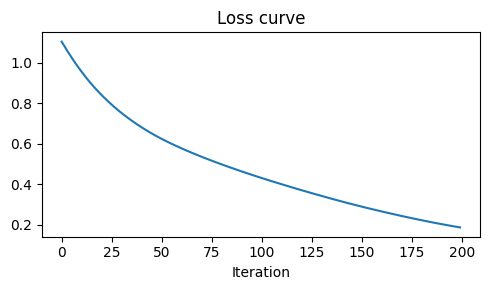

In [159]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.tight_layout()
plt.show()

### Predict

In [172]:
# X_new = [[8.4, 5]]
X_new = [[8.4, 5.2],
        [6.8, 4.2]]

X_new

[[8.4, 5.2], [6.8, 4.2]]

In [173]:
X_new_sc = sc.transform(X_new) #เราจะต้องทำ feature scaling ก่อนเข้า model
X_new_sc

c:\Users\araya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.99269274,  0.77532161],
       [-0.54437989, -0.31157784]])

In [177]:
print('Prediction : ', model.predict(X_new_sc))

Prediction :  [2 1]


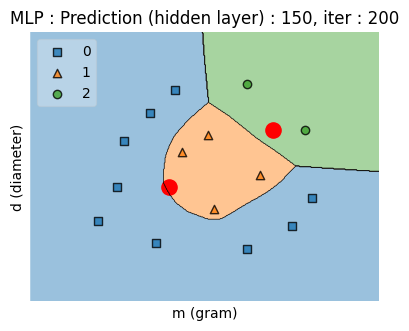

In [182]:
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)

# plt.title('MLP : Prediction')
plt.title('MLP : Prediction (hidden layer) : {}, iter : {}'.format(hidden, iter))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')

plt.scatter(X_new_sc[:,0], X_new_sc[:,1], marker='o', s=120, c='r')
plt.show()